# ML_pyladies 2019-08
# tutorial_anotado_iris_COPIA 

# based on   Liliane Nakazono workshop




In [ ]:
'''
1. Bibliotecas
'''
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

In [2]:
'''
2. Funcoes
'''

# Definindo funções:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [9]:
'''
3. Leitura de dados

Iris dataset
'''
# load_iris([return_X_y])

# input data
iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names) 

# output expected (real data)
target =  pd.DataFrame(datasets.load_iris().target, columns=['target'])


In [16]:
datasets.load_iris().data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
datasets.load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
# Target:
pd.DataFrame(datasets.load_iris().target, columns=['target'])

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
'''================================================================

4. Pré-análise dos dados

================================================================='''

In [37]:
type(iris)

pandas.core.frame.DataFrame

In [19]:
# lista nome das colunas:
list(iris)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
# muda nome das colunas:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [22]:
#checa tipo de cada coluna:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [23]:
# checa se tem NaNs
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [25]:
# retira linhas com NaNs
iris = iris.dropna()

# para retirar  n/a...
# muito cuidado para nao jogar fora dados que poderia ser importantes  !!!!!!!!
# checar antes se nao seria melhor imputar o 

In [33]:
# estatisticas:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [38]:
iris.sepal_length.mean() #média

5.843333333333334

In [39]:
# acessando linhas/colunas:
iris.iloc[ 0:5, :]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
iris.head(4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [41]:
iris.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [48]:
# iris.hist(bins=20)
# plt.show()

data = pd.concat([iris,target], axis=1)
# sns.pairplot(data, hue='target')


###### 
#data[0:10,0]  ERRADO
data[0:10]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [51]:
iris[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
#filtrando a tabela segundo determinadas condições
iris_2 = iris.query('petal_length>1 & petal_width>1 & sepal_length>1 & sepal_width>1')
# iris_2 = iris[(iris.petal_length>1) & (iris.petal_width>1) & (iris.sepal_length>1) & (iris.sepal_width>1)]

### extra
print(len(iris_2))
iris_2[0:10]

93


,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4
61,5.9,3.0,4.2,1.5


In [63]:
# acessa por label:   ---> LOC
iris_2.loc[50:52,:]  #---> Localiza identificador 50:52

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [57]:
### extra
# .loc é diferente do index... loc acessa por label.
iris_2[50:52]   # localiza linhas com índicelab 50:52...

,sepal_length,sepal_width,petal_length,petal_width
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8


In [68]:
# acessa por posição    -> ILOC
iris_2.iloc[0:3,]  # = iris_2.iloc[0:3,:]

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [70]:
# nova tabela com apenas algumas colunas:
petal = iris[['petal_length', 'petal_width']]
petal

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [72]:
#matriz de correlação:
'''
Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
Any na values are automatically excluded. 
For any non-numeric data type columns in the dataframe it is ignored.
Note: The correlation of a variable with itself is 1.
'''
iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


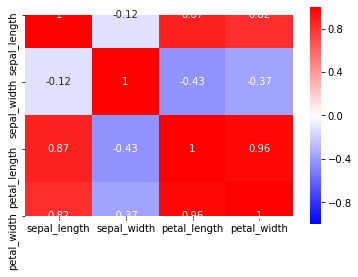

In [95]:
#plt.figure(figsize=(8, 8))
sns.heatmap (iris.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

'''
***8about graph cut error
#This was a matplotlib regression introduced in 3.1.1 
which has been fixed in 3.1.2 (still forthcoming). 
For now the fix is to downgrade matplotlib to a prior version.

***about categorical data overlap in axis
Here we have the classic problem with categorical data:
we need to display all the labels and because some of them are quite long, they overlap.
''' 


(0.0, 1.0)

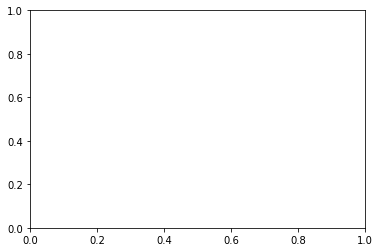

In [97]:
plt.ylim() 

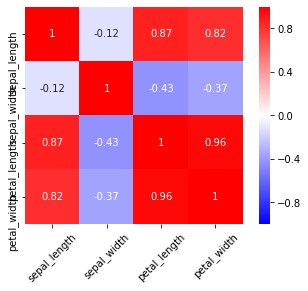

In [104]:
###EXTRA SOLUTION
# fix for mpl bug that cuts off top/bottom of seaborn viz

#sns.heatmap (iris.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)
chart=sns.heatmap (iris.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [105]:
#Imprimir tabela:

print(iris)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [106]:
#Nome dos atributos (colunas):

list(iris)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [94]:
#Contagem de linhas para um certo atributo:

#iris.atribute.value_counts()
    
iris.sepal_length.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

In [89]:
#Tipo dos atributos:

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [92]:
#Estatísticas:

iris.describe().T
#valores muito altos de desvio padrao, pode ser algum fator muito discrepante , pode ter outliers, 

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [108]:
# Média de um atributo:

#iris.atributo.mean()
iris.petal_length.mean()

3.7580000000000005

In [109]:
#Desvio padrão de um atributo:

iris.petal_length.std()

1.7652982332594662

In [112]:
iris.describe().T[0,1]
# NAO FUNCIONA

KeyError: (0, 1)

In [136]:
#Concatenar linhas/colunas:     
iris2=iris             
iris2.concat()  ############ NAO FUNCIONOU

AttributeError: 'DataFrame' object has no attribute 'concat'

In [119]:
data = pd.concat([iris,target], axis=1)
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [120]:
#Checar se tem NaNs:

iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [121]:
#Remover NaNs:

iris.dropna()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [125]:
#Acessar todas as colunas da linha em posição i:

#iris.iloc[i,:]
iris.iloc[10,:]  # ID 10, linha 11


sepal_length    5.4
sepal_width     3.7
petal_length    1.5
petal_width     0.2
Name: 10, dtype: float64

In [128]:
iris.loc[11,:]   # ID11 ( linha 12)

sepal_length    4.8
sepal_width     3.4
petal_length    1.6
petal_width     0.2
Name: 11, dtype: float64

In [129]:
#Acessar todas as colunas da linha de índice i:
# iris.loc[i,:]

iris.loc[1,:]    #  1	4.9	3.0	1.4	0.2

sepal_length    4.9
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 1, dtype: float64

In [130]:
#Filtrando tabela:
# Parte 1

#iris.query('condição1 & condição2')

# 'petal_length>1 & petal_width>1 & sepal_length>1 & sepal_width>1'

iris.query('petal_length>2 & sepal_length>2')

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [139]:
#Filtrando tabela:
# Parte 2
#iris[(condição1) & (condição2)]

#  iris[(iris.petal_length>2) & (iris.sepal_length>2)]############ NAO FUNCIONOU
iris[(iris.petal_length>2) & (iris.sepal_length>2)]  #########assim funcionou!!!

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11BA2950>,
      dtype=object)

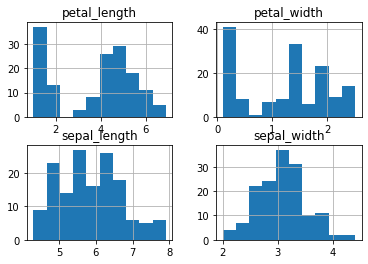

In [140]:
#Histograma:

iris.hist()

In [146]:
list(data)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [147]:
list(iris)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [149]:
target

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


LinAlgError: singular matrix

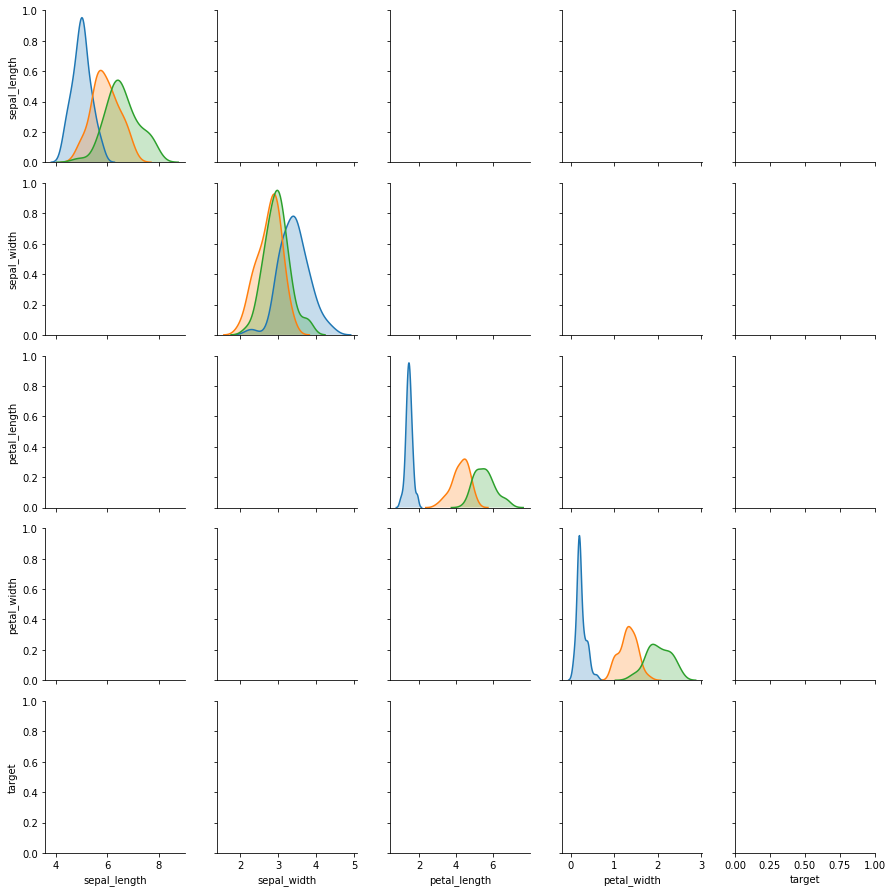

In [148]:
# Pairplot:
sns.pairplot(data, hue="target")   ###NAO FUNCIONOU
# data contém uma coluna chamada target com as classes


# sns.pairplot(data, hue='target') ## TB NAO FUNCIONOU

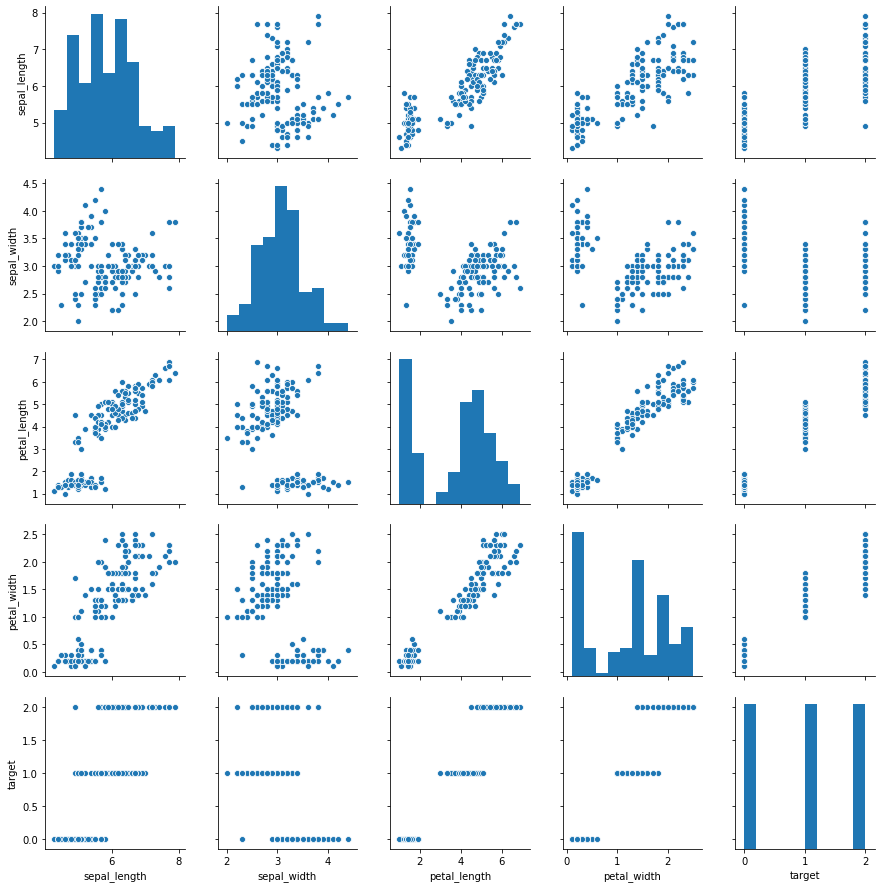

In [153]:
sns.pairplot(data)

In [154]:
# Matriz de correlação:

iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


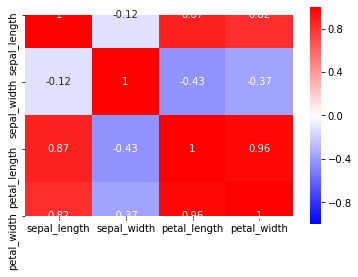

In [155]:
#Visualização matriz de correlação:

sns.heatmap(iris.corr(), cmap='bwr', vmax=1, vmin=-1,center=0, square=True, annot=True)

In [ ]:
'''================================================================

5.Amostragem para validação cruzada

================================================================='''

In [163]:
# Criando amostra de treinamento (70%) e de teste (30%):
X_train, X_test, y_train, y_test = train_test_split(iris, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state = 2)
# X contem o iris
# Y contem o target

In [173]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
28,5.2,3.4,1.4,0.2
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2
36,5.5,3.5,1.3,0.2
106,4.9,2.5,4.5,1.7
148,6.2,3.4,5.4,2.3
131,7.9,3.8,6.4,2.0
20,5.4,3.4,1.7,0.2


In [177]:
#novamente vamos rodar
X_train, X_test, y_train, y_test = train_test_split(iris, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state = 2)

In [178]:
X_train

# o resultado é igual ao anteior , pq usamos a mesma "regra de randomização": random_state_2

,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
28,5.2,3.4,1.4,0.2
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2
36,5.5,3.5,1.3,0.2
106,4.9,2.5,4.5,1.7
148,6.2,3.4,5.4,2.3
131,7.9,3.8,6.4,2.0
20,5.4,3.4,1.7,0.2


In [161]:
# Para fazer uma amostragem estratificada, adicionar o parâmetro:

stratify = target
#target: tem informaçòes das classes

#amostragem aleatorio: no micro tudo é "pseudo-aleatorio".
#random state é  um numero que sempre fornece as mesmas amostras de teste e treinamento.
#     a mesma regra de random_state=2 dáos mesmos resultados

###vamos checar : 

In [185]:
'''================================================================

6. Validação de modelo

================================================================='''

'''
========Random Forest
''' 
clf = RandomForestClassifier()

clf.fit(X_train, y_train.values.ravel())

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
y_pred1 = clf.predict(X_test)   #Valores preditos pelo modelo

# matrix = confusion_matrix(y_test, y_pred)
# fig = plot_confusion_matrix(matrix, 
#                     classes=['0', '1', '2'])
# plt.show()

print(metrics.classification_report
      (y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [181]:
y_train.values.ravel()

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2,
       0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0])

Confusion matrix, without normalization


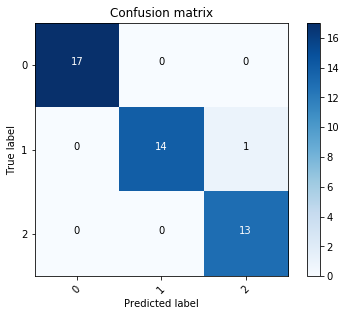

In [204]:
matrix1= confusion_matrix(y_test,y_pred1)

fig= plot_confusion_matrix(matrix1 , classes=['0','1','2'])

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [189]:

'''
======== SVC? 
''' 
clf2 = SVC(kernel='linear')

clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
clf2.fit(X_train,y_train.values.ravel())
y_pred2 = clf2.predict(X_test)



In [201]:
np.unique(target)

array([0, 1, 2])

Confusion matrix, without normalization


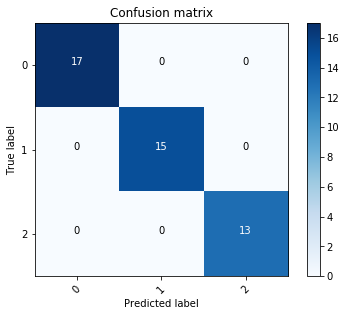

In [199]:
matrix2= confusion_matrix(y_test,y_pred2)

fig= plot_confusion_matrix(matrix2 , classes=['0','1','2'])

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [202]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



============================
Algoritmos:
Eu recomendo fortemente que vocês procurem a documentação de cada algoritmo e deem uma lida nos parâmetros pedidos de cada um!

==============================
k-Nearest Neighbors:

clf = KNeighborsClassifier()


Support Vector Machine:

clf = SVC()



Decision Tree:

clf = DecisionTreeClassifier()



Random Forest:

clf = RandomForestClassifier()



Treinamento do modelo:
clf.fit(X_train, y_train.values.ravel())



Teste:
y_pred = clf.predict(X_test)



Matriz de confusão:
matrix = confusion_matrix(y_test, y_pred)


fig = plot_confusion_matrix(matrix, classes=['0','1', '2'])


Métricas de performance:
metrics.classification_report(y_test, y_pred)